# Object Detection using ImageAI - Resnet50  




In [1]:
#Import the required libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from keras.utils.data_utils import GeneratorEnqueuer
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import math, os

%matplotlib inline

Using TensorFlow backend.


Load the images and create a generator object 

In [2]:
image_path = "../input/google-ai-open-images-object-detection-track/test/"

batch_size = 100
img_generator = ImageDataGenerator().flow_from_directory(image_path, shuffle=False, batch_size = batch_size)
n_rounds = math.ceil(img_generator.samples / img_generator.batch_size)
filenames = img_generator.filenames

img_generator = GeneratorEnqueuer(img_generator)
img_generator.start()
img_generator = img_generator.get()

Found 99999 images belonging to 1 classes.


Using imageai load resnet50 and use its weights to detect objects in the images 

In [5]:
from imageai.Detection import ObjectDetection
model_weight_path = "../input/imageairepo/imageai/resnet50_v2.0.1.h5"

execution_path = os.getcwd()
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath(model_weight_path)
detector.loadModel()

Lets view some predictions and detected objects 

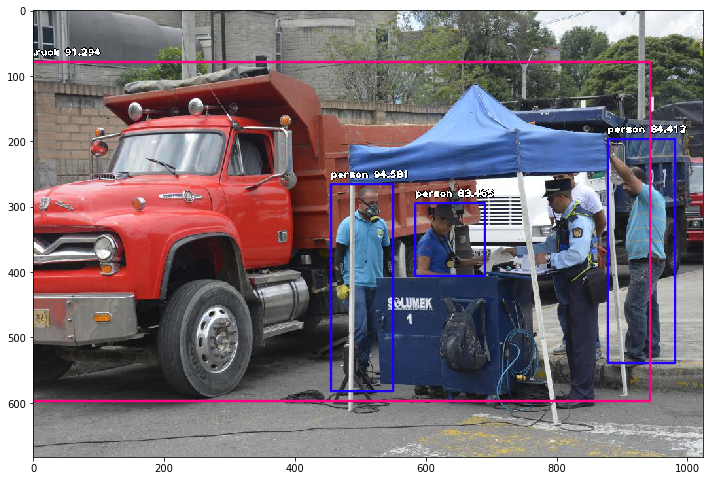

Labels Detected: 
person, 0.8 | person, 0.8 | person, 0.9 | truck, 0.9 | 

Prediction String: 
/m/01g317 0.8346453309059143 0.1 0.1 0.9 0.9 /m/01g317 0.8441165089607239 0.1 0.1 0.9 0.9 /m/01g317 0.9458135962486267 0.1 0.1 0.9 0.9 /m/07r04 0.912935197353363 0.1 0.1 0.9 0.9 


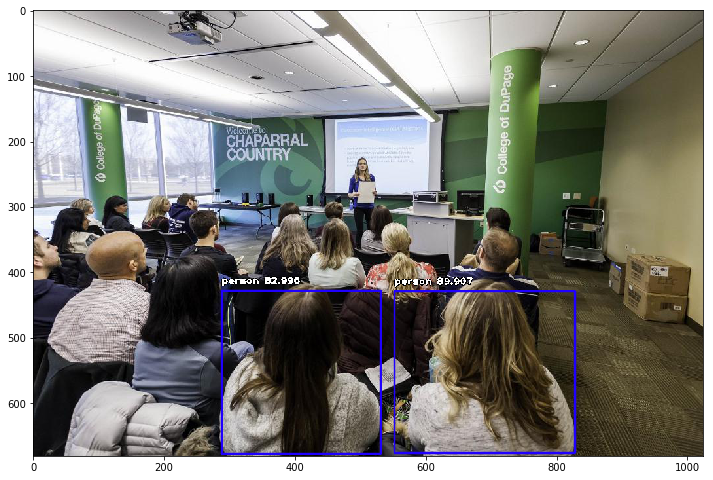

Labels Detected: 
person, 0.8 | person, 0.9 | 

Prediction String: 
/m/01g317 0.8299584984779358 0.1 0.1 0.9 0.9 /m/01g317 0.8990703821182251 0.1 0.1 0.9 0.9 


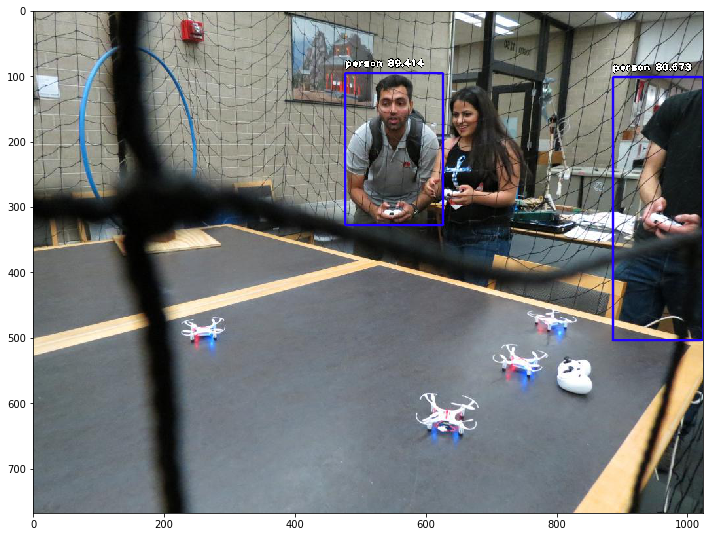

Labels Detected: 
person, 0.9 | person, 0.8 | 

Prediction String: 
/m/01g317 0.8941403031349182 0.1 0.1 0.9 0.9 /m/01g317 0.8067294359207153 0.1 0.1 0.9 0.9 


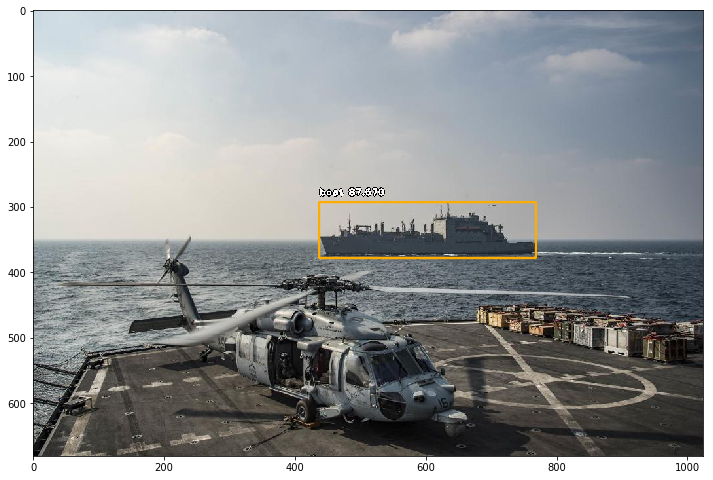

Labels Detected: 
boat, 0.9 | 

Prediction String: 
/m/019jd 0.8767009377479553 0.1 0.1 0.9 0.9 


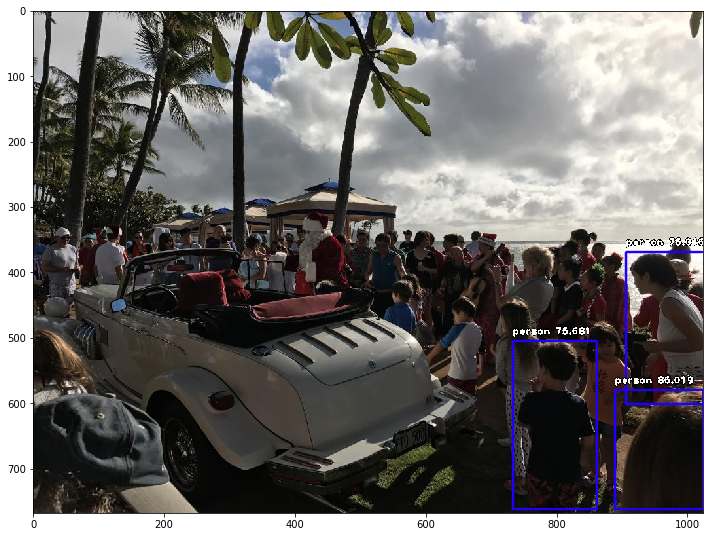

Labels Detected: 
person, 0.8 | person, 0.8 | person, 0.9 | 

Prediction String: 
/m/01g317 0.7504560351371765 0.1 0.1 0.9 0.9 /m/01g317 0.7568106055259705 0.1 0.1 0.9 0.9 /m/01g317 0.8601906299591064 0.1 0.1 0.9 0.9 


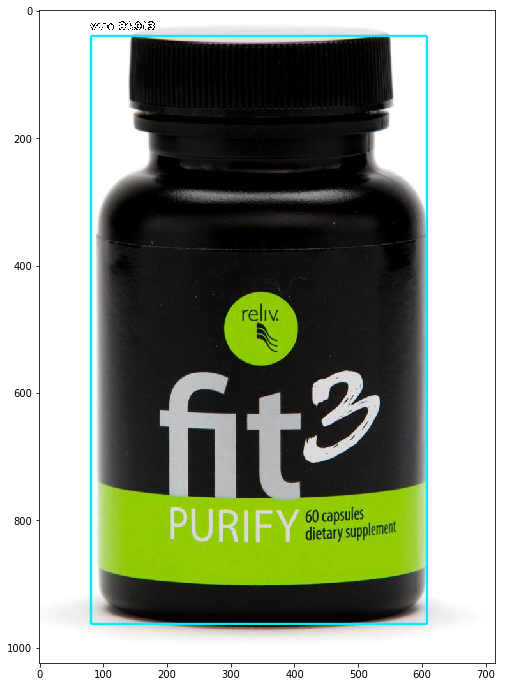

Labels Detected: 
vase, 0.8 | 

Prediction String: 
/m/02s195 0.8401322364807129 0.1 0.1 0.9 0.9 


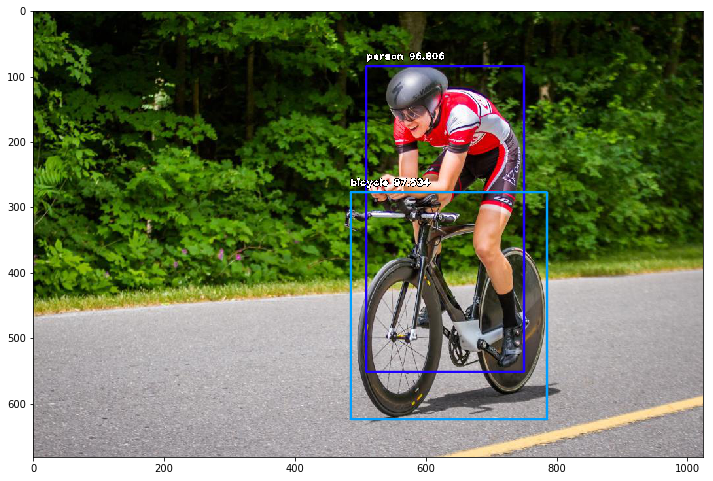

Labels Detected: 
person, 1.0 | bicycle, 1.0 | 

Prediction String: 
/m/01g317 0.9680647253990173 0.1 0.1 0.9 0.9 /m/0199g 0.9753354787826538 0.1 0.1 0.9 0.9 


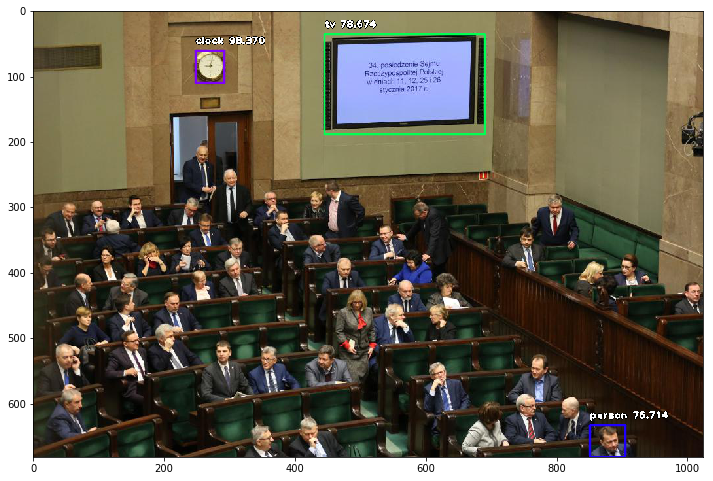

Labels Detected: 
clock, 1.0 | person, 0.8 | 

Prediction String: 
/m/01x3z 0.9837027788162231 0.1 0.1 0.9 0.9 /m/01g317 0.7571380734443665 0.1 0.1 0.9 0.9 


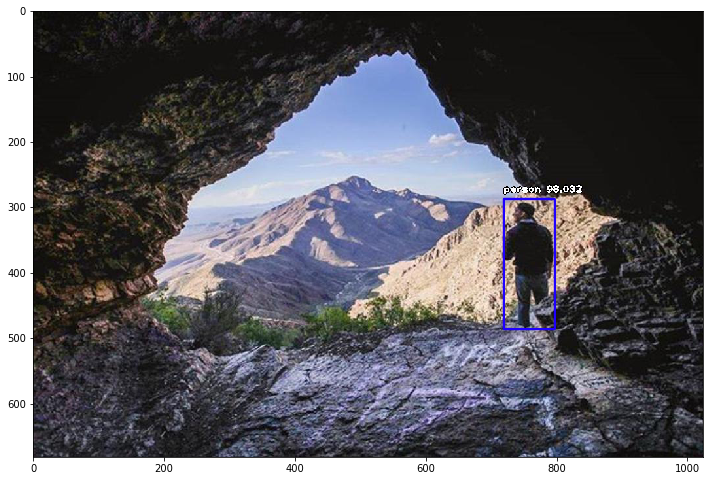

Labels Detected: 
person, 1.0 | 

Prediction String: 
/m/01g317 0.9803228378295898 0.1 0.1 0.9 0.9 


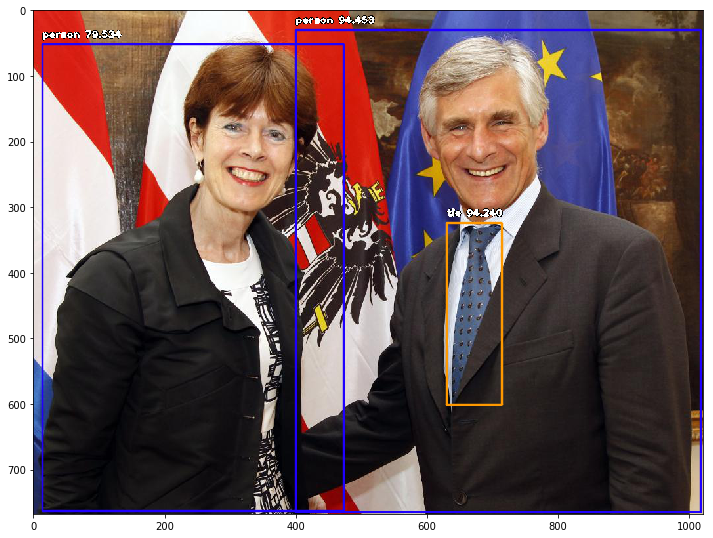

Labels Detected: 
tie, 0.9 | person, 0.8 | person, 0.9 | 

Prediction String: 
/m/01rkbr 0.942395031452179 0.1 0.1 0.9 0.9 /m/01g317 0.7953413724899292 0.1 0.1 0.9 0.9 /m/01g317 0.944532036781311 0.1 0.1 0.9 0.9 


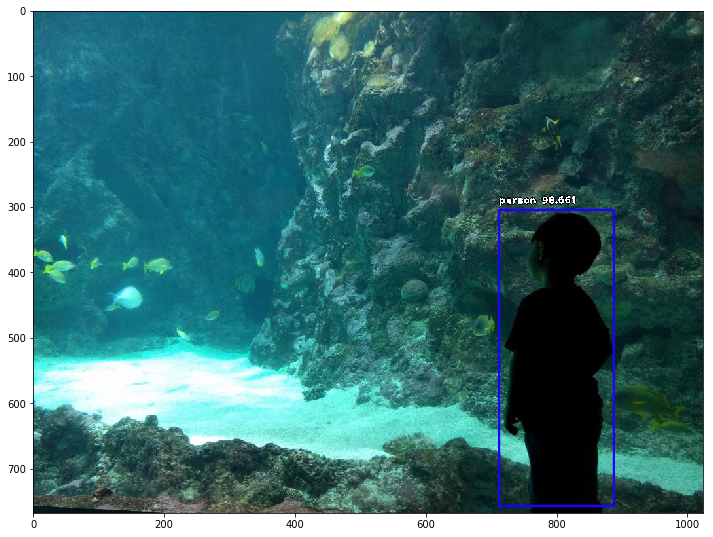

Labels Detected: 
person, 1.0 | 

Prediction String: 
/m/01g317 0.986609160900116 0.1 0.1 0.9 0.9 


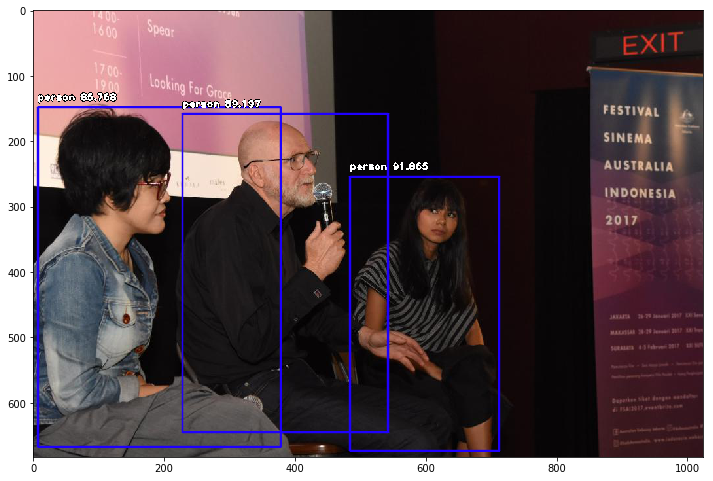

Labels Detected: 
person, 0.9 | person, 0.9 | person, 0.9 | 

Prediction String: 
/m/01g317 0.9186488389968872 0.1 0.1 0.9 0.9 /m/01g317 0.8576849102973938 0.1 0.1 0.9 0.9 /m/01g317 0.8919656872749329 0.1 0.1 0.9 0.9 


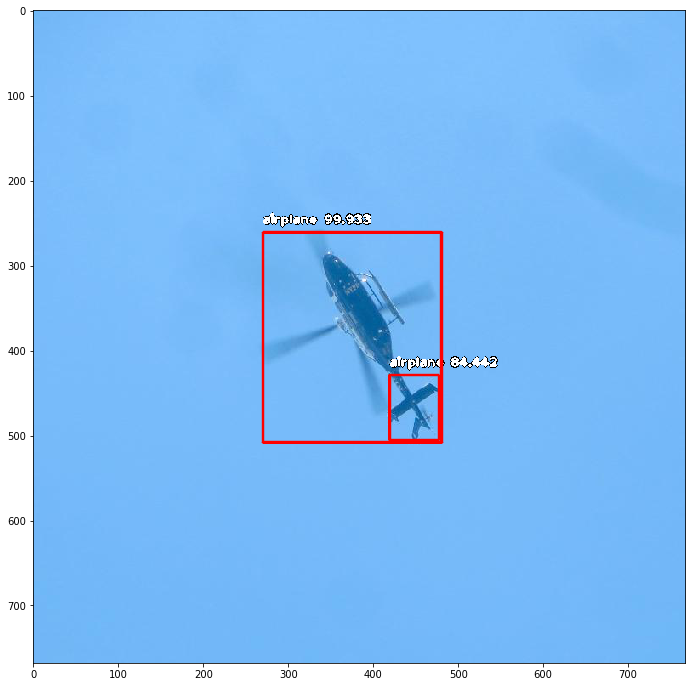

Labels Detected: 
airplane, 0.8 | airplane, 1.0 | 

Prediction String: 
/m/0cmf2 0.8444219827651978 0.1 0.1 0.9 0.9 /m/0cmf2 0.999327540397644 0.1 0.1 0.9 0.9 


In [6]:
for i in range(n_rounds):
    batch = next(img_generator)
    for j, prediction in enumerate(batch):
        image = filenames[i * batch_size + j]
        detections = detector.detectObjectsFromImage(input_image=image_path+image, output_image_path="image_with_box.png", minimum_percentage_probability = 75)        
        pred_str = ""
        labels = ""
        for eachObject in detections:    
            if eachObject["name"] in rev:
                pred_str += rev[eachObject["name"]] + " " + str(float(eachObject["percentage_probability"])/100) + " 0.1 0.1 0.9 0.9"
                pred_str += " "
                labels += eachObject['name'] + ", " + str(round(float(eachObject['percentage_probability'])/100, 1)) 
                labels += " | "
        if labels != "":
            plt.figure(figsize=(12,12))
            plt.imshow(plt.imread("image_with_box.png"))
            plt.show()

            print ("Labels Detected: ")
            print (labels)
            print ()
            print ("Prediction String: ")
            print (pred_str)

    if i == 10:
        break